In [ ]:
using CSV
using DataFrames
using Statistics

using Plots
using Plots.PlotMeasures

using NCBITaxonomy

In [ ]:
for file in readdir()
    if endswith(file, ".tsv")

        df = CSV.read(file, DataFrame, delim="\t", header=1)
        df[!, [:fxity, :aver_rmsd]] = round.(df[:,[:fxity, :aver_rmsd]], digits = 2)
        df = dropmissing(df)


        println("fxity vs nclusts: ", round(cor(df.fxity, df.nclusts), digits = 2),
        ";      fxity vs aver_rmsd: ", round(cor(df.fxity, df.aver_rmsd), digits = 2),
        ";      nclusts vs nfrags: ", round(cor(df.nclusts, df.nfrags), digits = 2),
        ";      nclusts vs aver_rmsd: ", round(cor(df.nclusts, df.aver_rmsd), digits = 2 )
        )


        p1 = histogram(df.fxity, bins=25,    xlabel="fxity", ylabel="Frequency", labels="")
        p2 = histogram(df.nclusts, bins=25,    xlabel="nclusts", ylabel="Frequency", labels="")
        p3 = histogram(df.aver_rmsd, bins=25,   xlabel="aver_rmsd", ylabel="Frequency", labels="")
        p4 = histogram(df.nfrags, bins=25,    xlabel="nfrags", ylabel="Frequency", labels="")

        p5 = scatter(df.fxity, df.nclusts,  xlabel="fxity", ylabel="nclusts", markershape=:circle, markersize = 3, labels="")
        p6 = scatter(df.fxity, df.aver_rmsd,  xlabel="fxity", ylabel="aver_rmsd", markershape=:circle, markersize = 3,labels="")
        p7 = scatter(df.nclusts, df.nfrags,  xlabel="nclusts", ylabel="nfrags", markershape=:circle, markersize = 3, labels="")
        p8 = scatter(df.nclusts, df.aver_rmsd,  xlabel="nclusts", ylabel="aver_rmsd", markershape=:circle, markersize = 3, labels="")



        plot(p1, p2, p3, p4, p5, p6, p7, p8, layout=(2, 4), margins = 5mm, dpi=300, xtickfontsize=6, ytickfontsize=6)
        plot!(size=(900,600))
        savefig("$(split(file,".")[1]).png")
    end
end


In [ ]:
taxondata = CSV.read("astral.id", DataFrame, header=1)

ids = []
lineages = []

for (id, taxid) in zip(taxondata.id, taxondata.taxid)
    try
        push!(lineages, lineage(taxon(taxid)))
        push!(ids, id) 
    catch
        println(id)
    end
end


In [ ]:
domains = [taxid[3].name for taxid=lineages]
domaindata = DataFrame(id=ids, domain=domains)
df = dropmissing(df)
e = "Eukaryota"
b = "Bacteria" 
a = "Archaea" 



"Archaea"

In [465]:
fxdata = CSV.read("scop40_fs6_rmsd30.tsv", DataFrame, delim="\t", header=1)
df = innerjoin(fxdata, taxondata, domaindata, on=:id)
df = dropmissing(df)
print()

In [466]:
println("foldexity ", mean(df[df.domain .== e,:].fxity))
println("foldexity ", mean(df[df.domain .== b,:].fxity))
println("foldexity ", mean(df[df.domain .== a,:].fxity))
println("foldexity ", median(df[df.domain .== e,:].fxity))
println("foldexity ", median(df[df.domain .== b,:].fxity))
println("foldexity ", median(df[df.domain .== a,:].fxity))
println()
println("average RMSD: ",mean(df[df.domain .== e,:].aver_rmsd))
println("average RMSD: ",mean(df[df.domain .== b,:].aver_rmsd))
println("average RMSD: ",mean(df[df.domain .== a,:].aver_rmsd))
println("average RMSD: ",median(df[df.domain .== e,:].aver_rmsd))
println("average RMSD: ",median(df[df.domain .== b,:].aver_rmsd))
println("average RMSD: ",median(df[df.domain .== a,:].aver_rmsd))

foldexity 0.6492458777527366
foldexity 0.6002231678066319
foldexity 0.5919332300300302
foldexity 0.6530012004801921
foldexity 0.6054421768707483
foldexity 0.5970149253731343

average RMSD: 8.566592655343122
average RMSD: 8.743778753900981
average RMSD: 8.750943928383128
average RMSD: 8.97375285010431
average RMSD: 9.142487587883455
average RMSD: 9.13885365501808


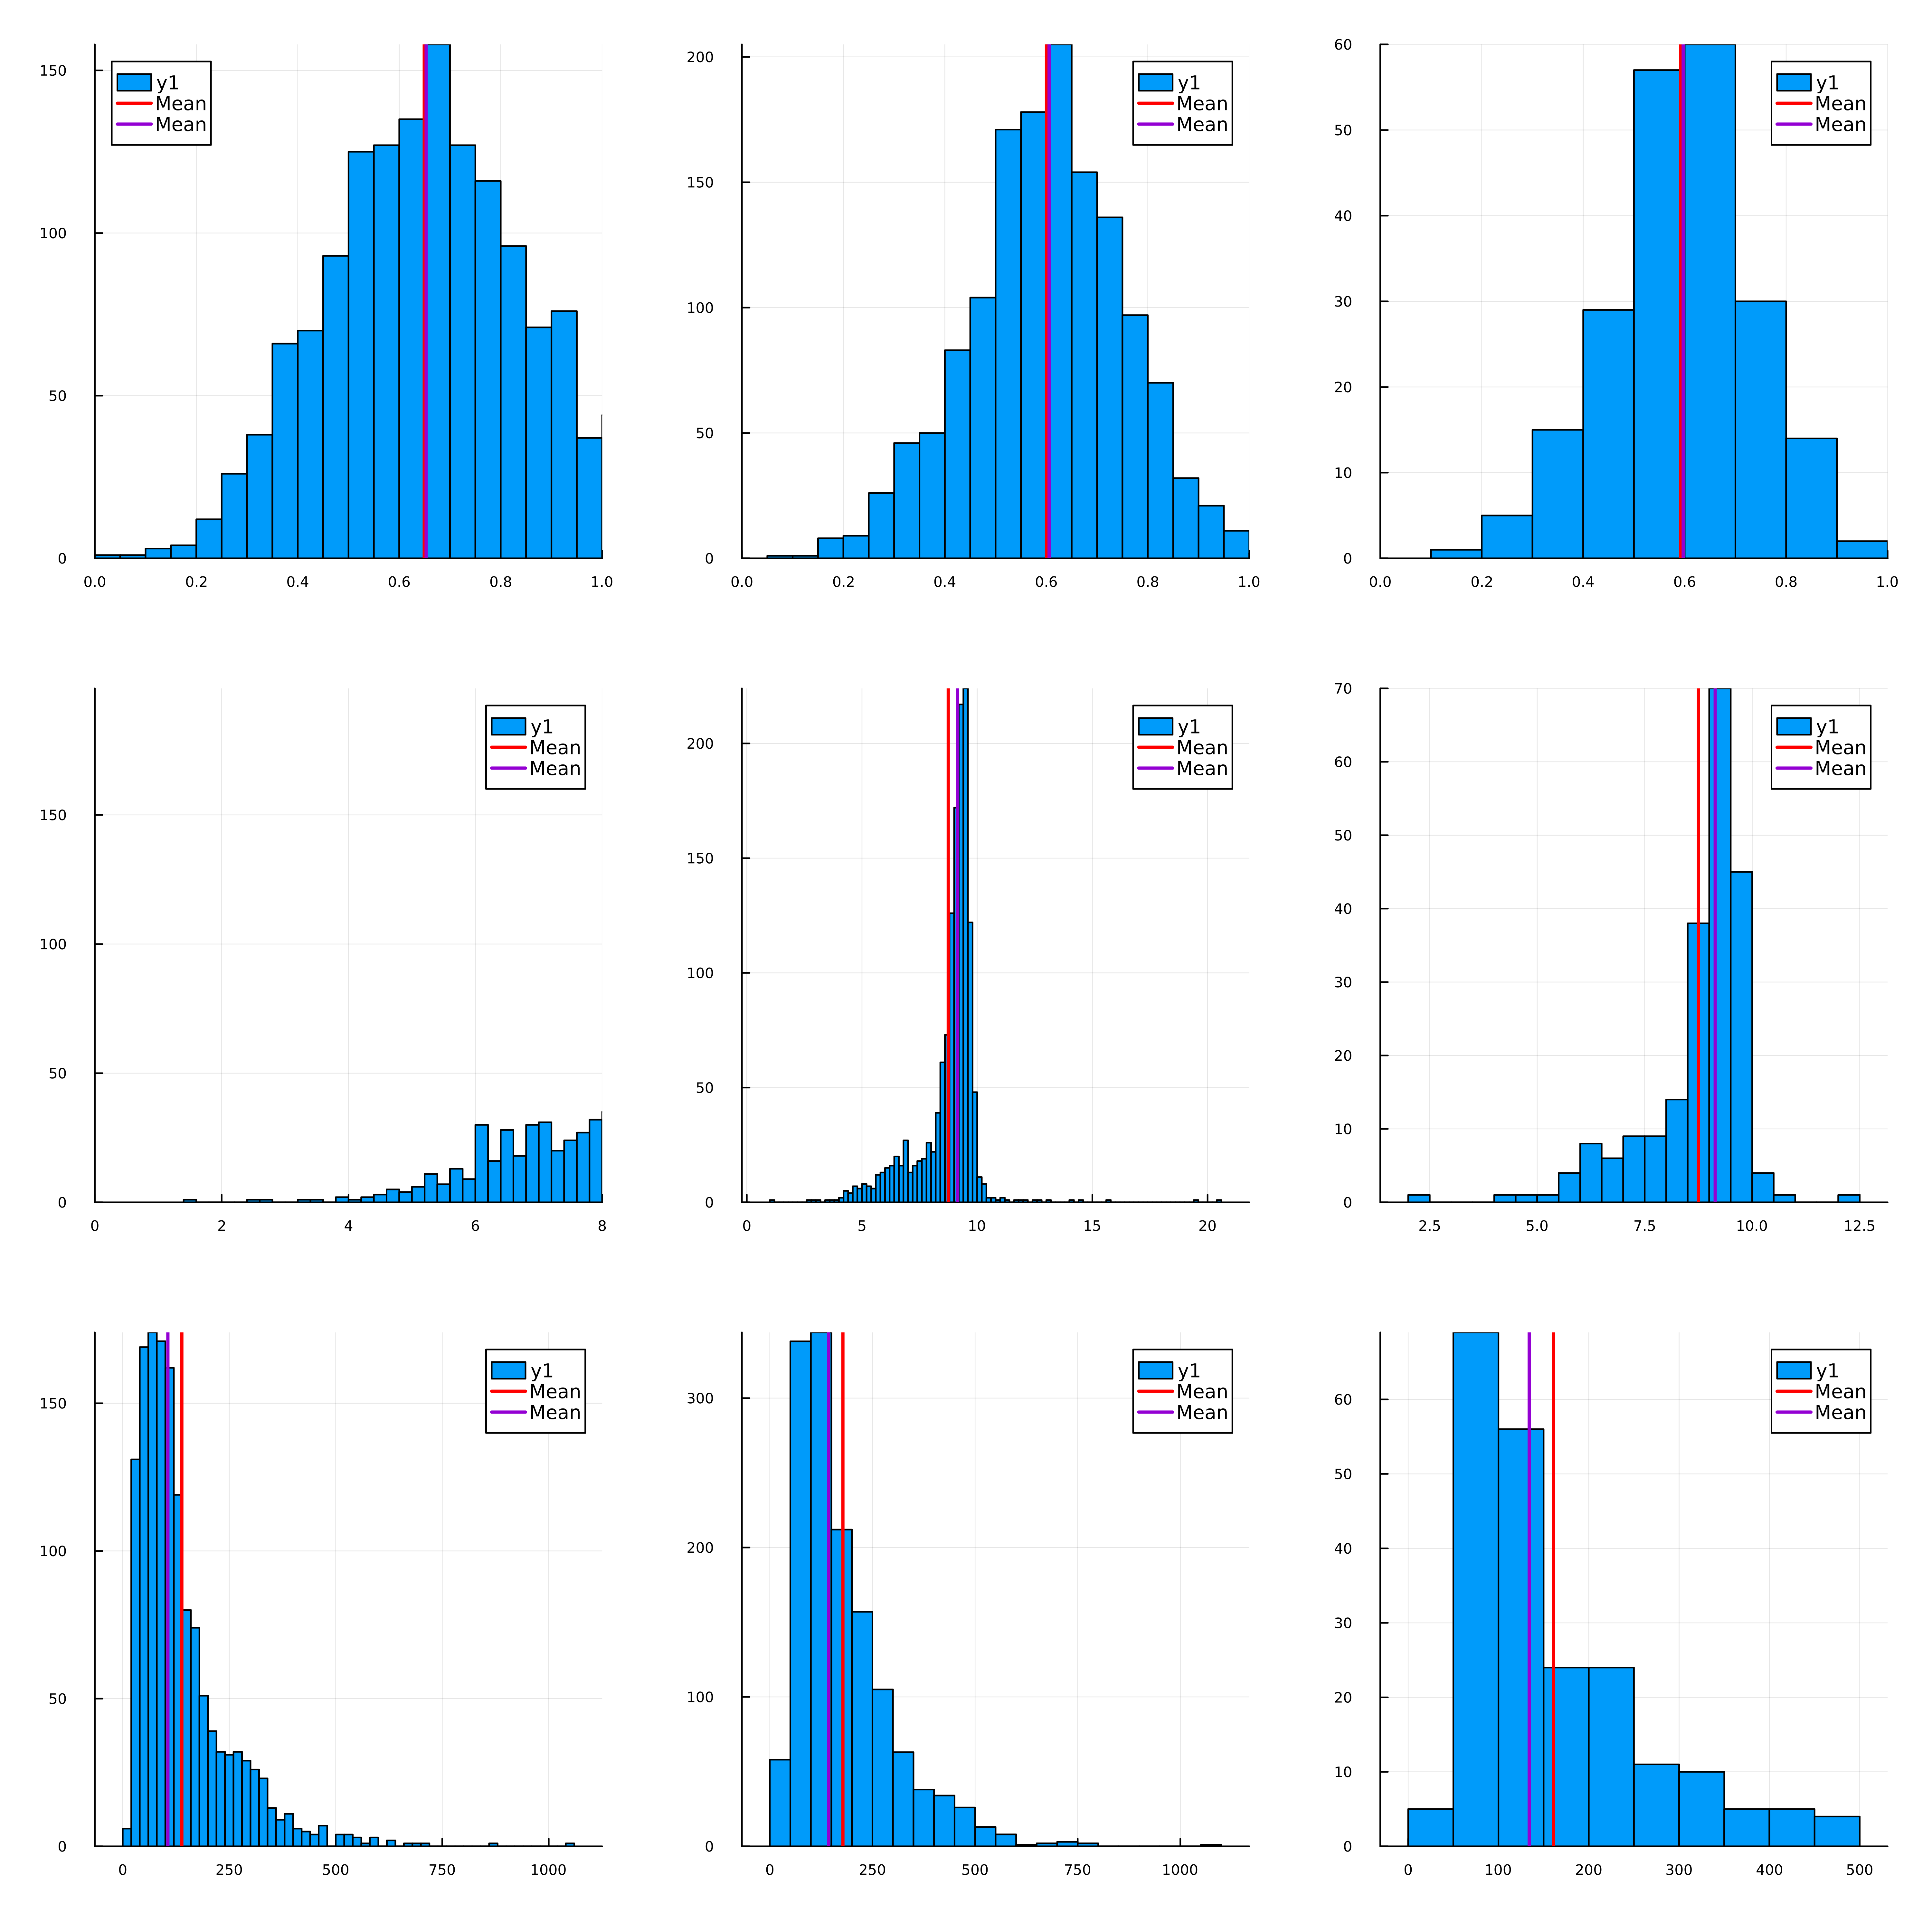

In [467]:
p11 = histogram(df[df.domain .== e,:].fxity, xlimits=(0,1))
p21 = histogram(df[df.domain .== b,:].fxity, xlimits=(0,1))
p31 = histogram(df[df.domain .== a,:].fxity, xlimits=(0,1))
vline!(p11, [mean(df[df.domain .== e,:].fxity)], lw=2, color="red", label="Mean")
vline!(p21, [mean(df[df.domain .== b,:].fxity)], lw=2, color="red", label="Mean")
vline!(p31, [mean(df[df.domain .== a,:].fxity)], lw=2, color="red", label="Mean")
vline!(p11, [median(df[df.domain .== e,:].fxity)], lw=2, color="dark violet", label="Mean")
vline!(p21, [median(df[df.domain .== b,:].fxity)], lw=2, color="dark violet", label="Mean")
vline!(p31, [median(df[df.domain .== a,:].fxity)], lw=2, color="dark violet", label="Mean")

p12 = histogram(df[df.domain .== e,:].aver_rmsd, xlimits = (0,8))
p22 = histogram(df[df.domain .== b,:].aver_rmsd)
p32 = histogram(df[df.domain .== a,:].aver_rmsd)
vline!(p12, [mean(df[df.domain .== e,:].aver_rmsd)], lw=2, color="red", label="Mean")
vline!(p22, [mean(df[df.domain .== b,:].aver_rmsd)], lw=2, color="red", label="Mean")
vline!(p32, [mean(df[df.domain .== a,:].aver_rmsd)], lw=2, color="red", label="Mean")
vline!(p12, [median(df[df.domain .== e,:].aver_rmsd)], lw=2, color="dark violet", label="Mean")
vline!(p22, [median(df[df.domain .== b,:].aver_rmsd)], lw=2, color="dark violet", label="Mean")
vline!(p32, [median(df[df.domain .== a,:].aver_rmsd)], lw=2, color="dark violet", label="Mean")

p13 = histogram(df[df.domain .== e,:].nfrags)
p23 = histogram(df[df.domain .== b,:].nfrags)
p33 = histogram(df[df.domain .== a,:].nfrags)
vline!(p13, [mean(df[df.domain .== e,:].nfrags)], lw=2, color="red", label="Mean")
vline!(p23, [mean(df[df.domain .== b,:].nfrags)], lw=2, color="red", label="Mean")
vline!(p33, [mean(df[df.domain .== a,:].nfrags)], lw=2, color="red", label="Mean")
vline!(p13, [median(df[df.domain .== e,:].nfrags)], lw=2, color="dark violet", label="Mean")
vline!(p23, [median(df[df.domain .== b,:].nfrags)], lw=2, color="dark violet", label="Mean")
vline!(p33, [median(df[df.domain .== a,:].nfrags)], lw=2, color="dark violet", label="Mean")




plot(p11, p21, p31, p12, p22, p32, p13, p23, p33, layout=(3, 3), margins = 5mm, dpi=500, xtickfontsize=6, ytickfontsize=6)
plot!(size=(1200,1200))

In [ ]:
df2 = df[(df.nfrags .> 100) .& (df.nfrags .< 1000),:]
sort!(df2,:aver_rmsd)
df2[end-10:end,:]